# Quantum Fourier Transform (QFT)
Quantum Fourier Transform (QFT) is a quantum algorithm that transforms a quantum state into its Fourier basis, efficiently extracting frequency components. It uses quantum parallelism to perform this transformation exponentially faster than classical Fourier transforms.

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.circuit.library import QFT
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Function to apply QFT
def apply_qft(circuit, n):
    for j in range(n):
        for k in range(j):
            circuit.cp(np.pi/2**(j-k), k, j)
        circuit.h(j)

In [3]:
# Function to apply inverse QFT
def apply_inverse_qft(circuit, n):
    for j in range(n//2):
        circuit.swap(j, n-1-j)
    for j in reversed(range(n)):
        circuit.h(j)
        for k in reversed(range(j)):
            circuit.cp(-np.pi/2**(j-k), k, j)

In [4]:
# Create a quantum circuit
num_qubits = 3
qf = QuantumCircuit(num_qubits)

# Apply Hadamard gates to nitialize the qubits to a superposition state
qf.h(range(num_qubits))

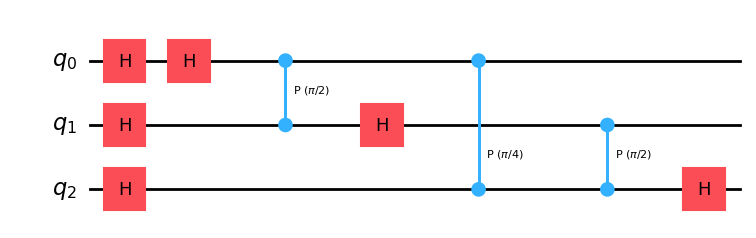

In [5]:
# Apply QFT
apply_qft(qf, num_qubits)

# Draw the circuit after QFT
qf.draw('mpl')

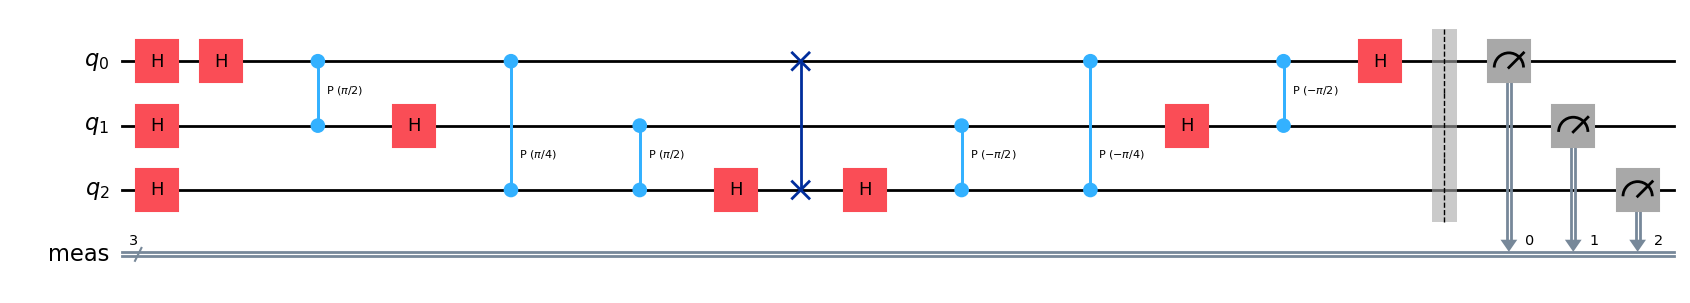

In [6]:
# Apply inverse QFT to verify correctness
apply_inverse_qft(qf, num_qubits)

# Measure the qubits
qf.measure_all()

# Draw the final circuit
qf.draw('mpl')

In [7]:
# Initialize the simulatorz
simulator = AerSimulator()

# Transpile and execute the circuit on the simulator
compiled_circuit = transpile(qf, simulator)

result = simulator.run(compiled_circuit).result()

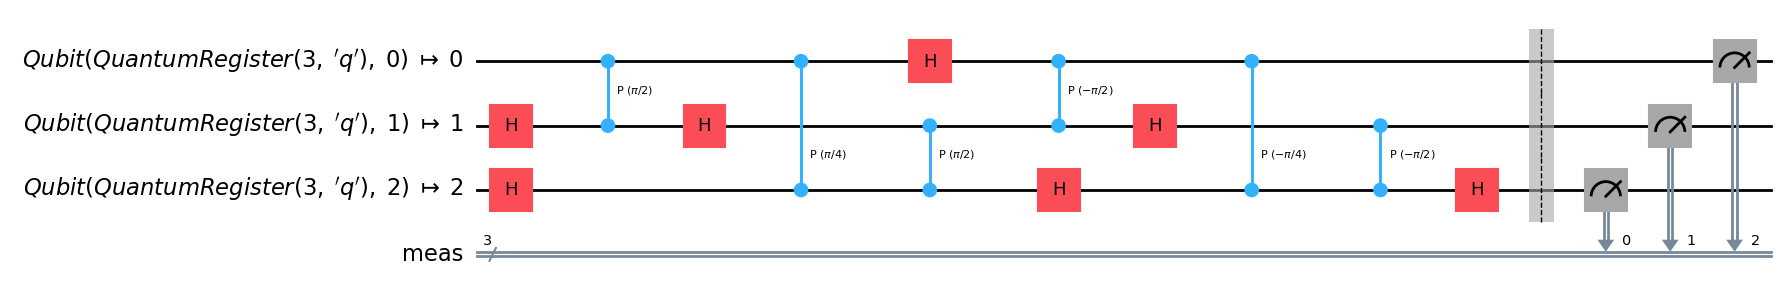

In [8]:
# Draw the transpiled circuit
compiled_circuit.draw('mpl')

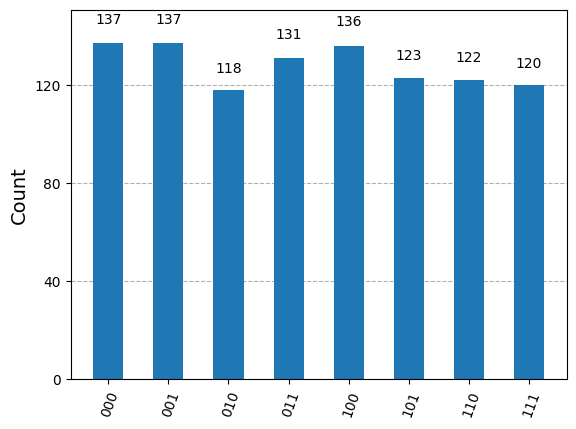

In [9]:
# Get and plot the results
counts = result.get_counts(qf)
plot_histogram(counts)